# Regression : 전통적인 방식 기반

#  4.1 선형 회귀(Linear Regression)

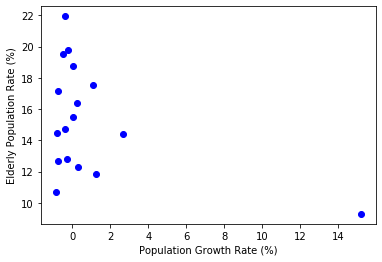

In [1]:
# 4.1 지역별 인구증가율과 고령인구비율 시각화
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

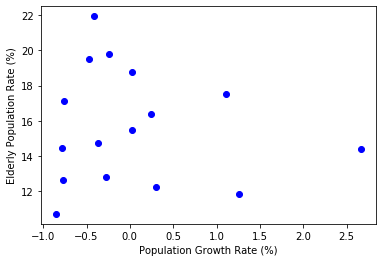

In [2]:
# 4.2 지역별 인구증가율과 고령인구비율 시각화: 극단치 제거
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

참고 수식
<img src="img/img_12.png">

a: -0.355834147915461 b: 15.669317743971302


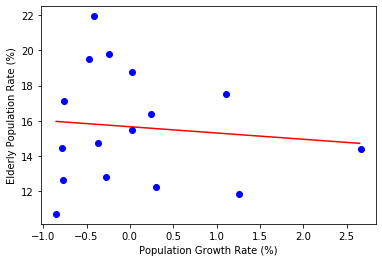

In [3]:
# 4.3 최소제곱법으로 회귀선 구하기
import numpy as np
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균을 구합니다.
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)


# 최소제곱법으로 a, b를 구합니다.
# 참고)  --> 2개의 리스트를 하나로 묶기 위해서 zip을 사용함!!!!!!
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선을 그립니다.
plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

* TF를 이용해서 적용해 보자!!! --> 결과는 그닥;;;;

99 a: 0.11798954 b: 6.7415624 loss: 89.30073
199 a: -0.119538054 b: 11.223195 loss: 29.502956
299 a: -0.25785702 b: 13.825649 loss: 13.172031
399 a: -0.32248226 b: 15.04172 loss: 10.173769
499 a: -0.3465603 b: 15.494807 loss: 9.811188
599 a: -0.35373658 b: 15.62985 loss: 9.782358
699 a: -0.35545126 b: 15.662113 loss: 9.780857
799 a: -0.35577828 b: 15.668271 loss: 9.780806
899 a: -0.35582736 b: 15.669198 loss: 9.780802
999 a: -0.35583323 b: 15.669302 loss: 9.780804


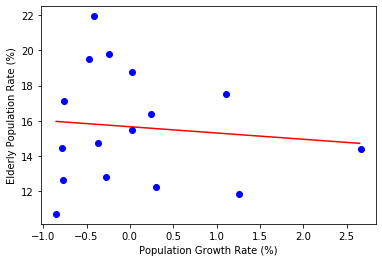

In [4]:
# 4.4 텐서플로를 이용해서 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss



# 여기서는 최적환 함수에 대해서는  Adam을 불러서 사용을 함!!!!! --> 이 외에도 여러 종류가 있음!!!
# 그리고 보통의 learning rate : 0.0001~ 0.1 사이의 값을 사용을 하기는 함....
optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 4.2 다항 회귀(Polynomial Regression) with TF

99 a: 4.013716 b: -5.831043 c: 6.4833617 loss: 68.340546
199 a: 2.7898746 b: -4.577506 c: 10.31117 loss: 31.429531
299 a: 1.268663 b: -2.2918923 c: 12.948546 loss: 15.975633
399 a: 0.3124403 b: -0.84765863 c: 14.589901 loss: 10.951242
499 a: -0.19555238 b: -0.0808077 c: 15.463693 loss: 9.720976
599 a: -0.42824984 b: 0.27043405 c: 15.864108 loss: 9.492279
699 a: -0.52048147 b: 0.4096496 c: 16.022827 loss: 9.459902
799 a: -0.55215853 b: 0.45746264 c: 16.077343 loss: 9.456413
899 a: -0.5615732 b: 0.4716745 c: 16.093538 loss: 9.456129
999 a: -0.56398684 b: 0.475317 c: 16.097694 loss: 9.456112


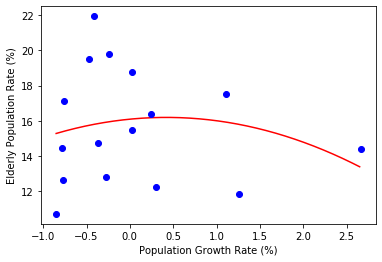

In [5]:
# 4.5 텐서플로우를 이용해서 2차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X + b * X + c
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: -0.9617551 b: 5.175143 c: -3.7143128 d: 6.9866514 loss: 57.36606
199 a: -1.7318395 b: 6.066386 c: -2.2347546 d: 10.449147 loss: 27.65189
299 a: -1.4527854 b: 4.47332 c: -0.8972367 d: 12.504481 loss: 18.284615
399 a: -0.768564 b: 2.3079057 c: -0.52317405 d: 13.913739 loss: 13.269403
499 a: -0.105856456 b: 0.37205958 c: -0.43776295 d: 14.961149 loss: 10.450808
599 a: 0.41298133 b: -1.1213369 c: -0.4085766 d: 15.736354 loss: 9.028368
699 a: 0.7825396 b: -2.1824176 c: -0.39218208 d: 16.282907 loss: 8.389827
799 a: 1.0284896 b: -2.8882828 c: -0.3817682 d: 16.645927 loss: 8.134361
899 a: 1.1822742 b: -3.329593 c: -0.37532777 d: 16.872803 loss: 8.043224
999 a: 1.2727172 b: -3.5891247 c: -0.37155366 d: 17.006199 loss: 8.014259


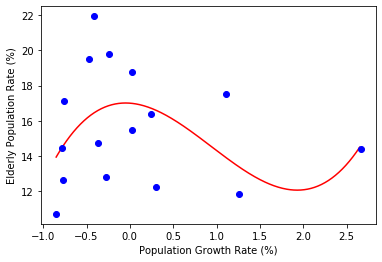

In [6]:
# 4.6 텐서플로우를 이용해서 3차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c, d를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
# def compute_loss():
#     y_pred = a * X*X + b * X + c
#     loss = tf.reduce_mean((Y - y_pred) ** 2)
#     return loss
def compute_loss():
#     y_pred = a*X**3 + b * X**2 + c * X + d
    y_pred = a * np.power(X, 3) + b * np.power(X,2) + c * np.power(X,1) + d
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

# optimizer = tf.keras.optimizers.Adam(lr=0.07)
optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c,d])
#     optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# Regression : Only Neural Network!!! --< Not 기존의 방식

# 4.3 딥러닝 네트워크를 이용한 회귀

<img src="img/img_13.png">

In [7]:
# 4.7 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 4.8 딥러닝 네트워크의 학습
model.fit(X, Y, epochs=10)

Train on 16 samples
Epoch 1/10
16/16 [==============================] - 0s 18ms/sample - loss: 254.8196
Epoch 2/10
16/16 [==============================] - 0s 553us/sample - loss: 116.7461
Epoch 3/10
16/16 [==============================] - 0s 555us/sample - loss: 9.4436
Epoch 4/10
16/16 [==============================] - 0s 658us/sample - loss: 9.4152
Epoch 5/10
16/16 [==============================] - 0s 686us/sample - loss: 9.3858
Epoch 6/10
16/16 [==============================] - 0s 706us/sample - loss: 9.3541
Epoch 7/10
16/16 [==============================] - 0s 688us/sample - loss: 9.3197
Epoch 8/10
16/16 [==============================] - 0s 763us/sample - loss: 9.2824
Epoch 9/10
16/16 [==============================] - 0s 689us/sample - loss: 9.2422
Epoch 10/10
16/16 [==============================] - 0s 685us/sample - loss: 9.1991


In [9]:
# 4.9 딥러닝 네트워크의 Y값 예측
model.predict(X)

array([[15.984716],
       [15.49678 ],
       [15.03874 ],
       [16.058289],
       [15.193178],
       [16.012802],
       [15.995888],
       [15.841339],
       [15.510231],
       [15.919521],
       [15.398375],
       [15.890242],
       [15.980854],
       [16.058382],
       [15.523529],
       [14.257048]], dtype=float32)

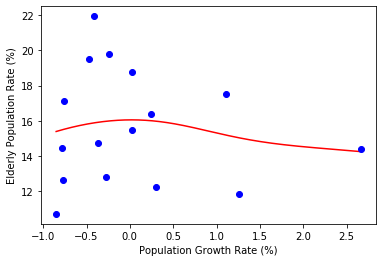

In [10]:
# 4.10 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

* 이렇게 앞에서의 전통적인 방식처럼 회귀식의 모형을 가정을 하지 않고 이에 대한 문제들을 해결을 할 수 있다!!!--> 거의 2차 식과 유사하기는 하지만 다른 부분이 있음!!!

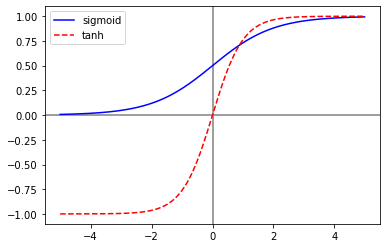

In [11]:
# 그림 4.2 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

# 4.4 보스턴 주택 가격 데이터세트(Boston Housing Dataset)

참고) tf에서 가지고 있는 데이터 셋들...
<img src="img/img_14.png">

In [12]:
# 4.11 데이터 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [13]:
# 4.12 데이터 전처리(정규화)
x_mean = train_X.mean()
x_std = train_X.std()
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean()
y_std = train_Y.std()
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157


In [14]:
# 4.13 Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_3 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


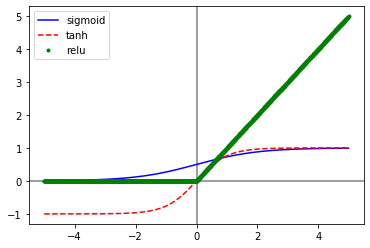

In [15]:
# 그림 4.5 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

* 참고) validation_split --> 주어진 셋의 일부를 Validation 셋으로 하고, 이에 대한 평가인 val_loss를 함께 표시를 함.    
최종 test전의 임시의 test이기떄문에 loss와 차이가 있음!!!


In [16]:
# 4.14 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 1s 2ms/sample - loss: 4.5770 - val_loss: 1.3900
Epoch 2/25
303/303 [==============================] - 0s 150us/sample - loss: 0.9276 - val_loss: 1.2970
Epoch 3/25
303/303 [==============================] - 0s 131us/sample - loss: 0.9506 - val_loss: 1.3447
Epoch 4/25
303/303 [==============================] - 0s 134us/sample - loss: 0.9283 - val_loss: 1.2517
Epoch 5/25
303/303 [==============================] - 0s 137us/sample - loss: 0.7401 - val_loss: 1.1295
Epoch 6/25
303/303 [==============================] - 0s 136us/sample - loss: 0.6781 - val_loss: 1.1123
Epoch 7/25
303/303 [==============================] - 0s 127us/sample - loss: 0.6641 - val_loss: 1.0603
Epoch 8/25
303/303 [==============================] - 0s 135us/sample - loss: 0.6727 - val_loss: 1.0407
Epoch 9/25
303/303 [==============================] - 0s 129us/sample - loss: 0.6660 - val_loss: 1.0749
Epoch 10/25
303/303 

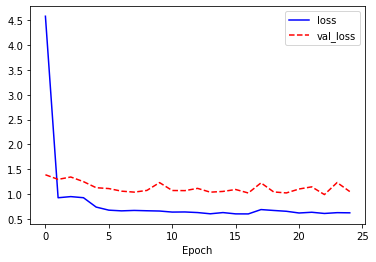

In [17]:
# 4.15 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [18]:
# 4.16 회귀 모델 평가
model.evaluate(test_X, test_Y)

102/102 [==============================] - 0s 86us/sample - loss: 0.7294


0.7293542646894268

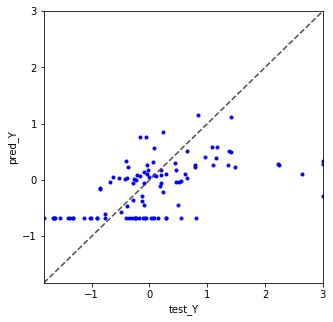

In [19]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

* 중요!!) 위의 경우에는 학습시 보다 검증에서 너무나 큰 오차가 발생을 하였기에 overfitting이 이루어졌을 것으로 판단이 됨.   
    - 이런 경우에 있어서 학습 도중에 끼어들기 위해서 callback함수를 사용한다. 
    - 콜백함수는 모델을 학습할 때 에포크가 끝날 때 마다 호출이 된다.
    - callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]
    - 여기서는 EarlyStopping으로 학습을 일찍 멈추는 기능으로, 
    - patiencce는 몇 번의 에포크를 기준으로 삼을 것인지,
    - monitor 은 어떤 값을 지켜볼 것인지에 대한 인수들!!!!
    - 즉, 아래 경우에 있어서는 : val_loss가 3회이 에포크를 수행을 하는 동안 최고 기록을 갱신하지 못한다면 학습을 중단하는 것!!!!

In [20]:
# 4.18 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 1s 2ms/sample - loss: 1.6074 - val_loss: 1.1569
Epoch 2/25
303/303 [==============================] - 0s 148us/sample - loss: 0.8171 - val_loss: 1.2019
Epoch 3/25
303/303 [==============================] - 0s 137us/sample - loss: 0.7021 - val_loss: 1.1034
Epoch 4/25
303/303 [==============================] - 0s 127us/sample - loss: 0.6457 - val_loss: 1.0839
Epoch 5/25
303/303 [==============================] - 0s 127us/sample - loss: 0.6427 - val_loss: 1.1358
Epoch 6/25
303/303 [==============================] - 0s 145us/sample - loss: 0.6536 - val_loss: 1.0348
Epoch 7/25
303/303 [==============================] - 0s 136us/sample - loss: 0.6629 - val_loss: 1.0635
Epoch 8/25
303/303 [==============================] - 0s 130us/sample - loss: 0.6210 - val_loss: 1.0814
Epoch 9/25
303/303 [==============================] - 0s 157us/sample - loss: 0.6227 - val_loss: 1.1355


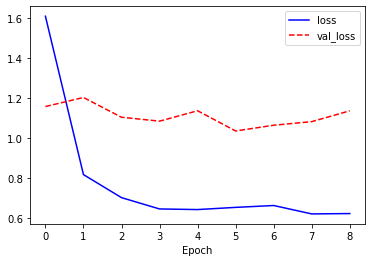

In [21]:
# 4.19 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [22]:
# 4.20 회귀 모델 평가
model.evaluate(test_X, test_Y)

102/102 [==============================] - 0s 78us/sample - loss: 0.7131


0.7130889284844492

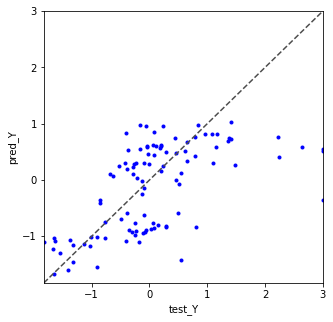

In [23]:
# 4.21 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()